In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as c
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
h_kB_cgs = (c.h/c.k_B).cgs.value

In [3]:
def HeIbf(nu, T):
    """Compute the Helium bound-free cross sections in cgs units as a
    function of temperature in K. Computed per atom. Computed using:
    https://articles.adsabs.harvard.edu/pdf/1970SAOSR.309.....K
    
    Parameters
    ----------
    nu: Frequency or a list (numpy array) of frequencies.
    """
    he_level =[# Level 1: 1S 
    [1,1,0.0,5.9447e15,[33.32,-2.0]],
    # Level 2: 2^3S  
    [2,3,19.819,1.1526e15,[-390.026,21.035,-0.318]],
    # Level 3: 2^1S 
    [3,1,20.615,0.96025e15,[26.83,-1.91]],
    # Level 4: 2^3P^0 
    [4,9,20.964,0.87607e15,[61.21,-2.9]],
    # Level 5: 2^1P^0 
    [5,3,21.217,0.81465e15,[81.35,-3.5]],
    # Level 6: 3^3S 
    [6,3,22.718,0.4519e15,[12.69,-1.54]],
    # Level 7: 3^1S 
    [7,1,22.920,0.4031e15,[23.85,-1.86]],
    # Level 8: 3^3P^0 
    [8,9,23.006,0.3821e15,[49.30,-2.60]],
    # Level 9: 3^3D+3^1D 
    [9,20,23.073,0.3659e15,[85.20,-3.69]],
    # Level 11: 3^1P^0 
    [11, 3, 23.086, 0.3628e15, [58.81, -2.89]]]



    nu_val = nu.to_value(u.Hz) if hasattr(nu, 'unit') else nu
    T_val = T.to_value(u.K) if hasattr(T, 'unit') else T
    alpha = np.zeros_like(nu_val)
    ev_kB_cgs = (1*u.eV/c.k_B).cgs.value

    
    for i in range(0,len(he_level)):
        level = he_level[i][0]
        g_i = he_level[i][1]
        E_i_eV = he_level[i][2]
        nu_threshold = he_level[i][3]
        ln_a_i = he_level[i][4]

        mask = nu_val >= nu_threshold

        nu_masked = nu_val[mask]

        if len(ln_a_i) == 2:
            a = ln_a_i[0]
            b = ln_a_i[1]
            ln_a = a + b * np.log(nu_masked)
        else:
            a = ln_a_i[0]
            b = ln_a_i[1]
            c = ln_a_i[2]
            ln_a = a + (b+c * np.log(nu_masked))*np.log(nu_masked)

        # Note question for higher levels -> do I need to do n=> 4 differently 

        cross_section = np.exp(ln_a)
        boltzmann_factor = g_i * np.exp(-E_i_eV * ev_kB_cgs / T_val)
        
        # total crossection 
        alpha[mask] += cross_section * boltzmann_factor
    
    return alpha * (1-np.exp(-h_kB_cgs*nu_val/T_val))


In [4]:
from scipy.special import voigt_profile


In [5]:
df = pd.read_csv("temp vs tau.csv")

In [6]:
df

,tau,T(tau),unit
0,0.000001,455897.1312601135 K,NaN
1,0.000002,455897.1312601135 K,NaN
2,0.000003,455897.1312601135 K,NaN
3,0.000005,455897.1312601135 K,NaN
4,0.000010,455897.1312601135 K,NaN
5,0.000017,455897.1312601135 K,NaN
6,0.000029,455897.1312601135 K,NaN
7,0.000052,455897.1312601135 K,NaN
8,0.000091,455897.1312601135 K,NaN
9,0.000160,455897.1312601135 K,NaN


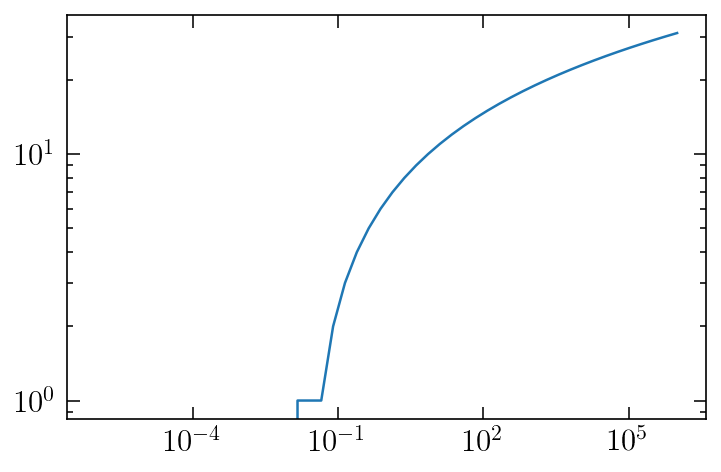

In [7]:
plt.plot(df["tau"],df["T(tau)"])
plt.yscale("log")
plt.xscale("log")

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expn
import astropy.units as u
import astropy.constants as c
from scipy.integrate import cumulative_trapezoid as cumtrapz

def lambda_matrix(tau_grid):
	"""
	Compute the Lambda operator as a matrix based on a tau grid.
	
	Parameters
	----------
	tau_grid: (n_tau) numpy.array
		A grid of optical depth points, starting at 0 and monotonically increasing.
	
	Returns
	-------
	lambda_mat: (n_tau) numpy.array
		A matrix defined so that to obtain vector of mean intensities J from a vector 
		of source functions S we simply compute: J=numpy.dot(lambda_mat, S)
	"""
	#Fill our final result matrix with zeros
	lambda_mat = np.zeros( (len(tau_grid), len(tau_grid)) )
	
	#Create a delta-tau grid
	delta_tau = tau_grid[1:] - tau_grid[:-1]
	
	#For simplicity and readability, just go through one layer at a time.
	for j in range(len(tau_grid)):
		#Create E2 and E3 vectors
		E2_vect = expn(2,np.abs(tau_grid - tau_grid[j]))
		E3_vect = expn(3,np.abs(tau_grid - tau_grid[j]))
		
		#Add the contribution from the i'th layer, for upwards going rays
		lambda_mat[j,j:-1] +=  E2_vect[j:-1] - (E3_vect[j:-1] - E3_vect[j+1:])/delta_tau[j:] 
		
		#Add the contribution from the i+1'th layer, for upwards going rays
		lambda_mat[j,j+1:]  += -E2_vect[j+1:]  + (E3_vect[j:-1] - E3_vect[j+1:])/delta_tau[j:]
		
		#Add the contribution from the i'th layer, for downwards going rays
		lambda_mat[j,1:j+1] +=  E2_vect[1:j+1] - (E3_vect[1:j+1] - E3_vect[:j])/delta_tau[:j] 
		
		#Add the contribution from the i-1'th layer, for downwards going rays
		lambda_mat[j,:j]  += -E2_vect[:j]  + (E3_vect[1:j+1] - E3_vect[:j])/delta_tau[:j] 
		
		#Add the contribution from the lower boundary condition
		lambda_mat[j,-1] +=  E3_vect[-1]/delta_tau[-1] + E2_vect[-1]
		lambda_mat[j,-2] += -E3_vect[-1]/delta_tau[-1]
	return 0.5*lambda_mat
	
def phi_matrix(tau_grid):
	"""
	Compute the phi operator as a matrix based on a tau grid.
	
	This differs from the Lambda matrix because of a sign difference.
	
	Parameters
	----------
	tau_grid: (n_tau) numpy.array
		A grid of optical depth points, starting at 0 and monotonically increasing.
	
	Returns
	-------
	phi_mat: (n_tau) numpy.array
		A matrix defined so that to obtain vector of Eddington fluxes H from a vector 
		of source functions S we simply compute: H=numpy.dot(phi_mat, S)
	"""
	#Fill our final result matrix with zeros
	phi_mat = np.zeros( (len(tau_grid), len(tau_grid)) )
	
	#Create a delta-tau grid
	delta_tau = tau_grid[1:] - tau_grid[:-1]
	
	#For simplicity and readability, just go through one layer at a time.
	for j in range(len(tau_grid)):
		#Create E3 and E4 vectors
		E3_vect = expn(3,np.abs(tau_grid - tau_grid[j]))
		E4_vect = expn(4,np.abs(tau_grid - tau_grid[j]))
		
		#Add the contribution from the i'th layer, for upwards going rays
		phi_mat[j,j:-1] +=  E3_vect[j:-1] - (E4_vect[j:-1] - E4_vect[j+1:])/delta_tau[j:] 
		
		#Add the contribution from the i+1'th layer, for upwards going rays
		phi_mat[j,j+1:]  += -E3_vect[j+1:]  + (E4_vect[j:-1] - E4_vect[j+1:])/delta_tau[j:]
		
		#Add the contribution from the i'th layer, for downwards going rays
		phi_mat[j,1:j+1] -=  E3_vect[1:j+1] - (E4_vect[1:j+1] - E4_vect[:j])/delta_tau[:j] 
		
		#Add the contribution from the i-1'th layer, for downwards going rays
		phi_mat[j,:j]  -= -E3_vect[:j]  + (E4_vect[1:j+1] - E4_vect[:j])/delta_tau[:j] 
		
		#Add the contribution from the lower boundary condition
		phi_mat[j,-1] +=  E4_vect[-1]/delta_tau[-1] + E3_vect[-1]
		phi_mat[j,-2] += -E4_vect[-1]/delta_tau[-1]
	return 0.5*phi_mat

	
def calc_Bnu(T, nu):
	return ( 2*c.h*nu**3/c.c**2 / (np.exp(c.h*nu/c.k_B/T) - 1) ).to(u.erg/u.cm**2)


2744011335.py: 0           0.000001
1           0.000002
2           0.000003
3           0.000005
4           0.000010
5           0.000017
6           0.000029
7           0.000052
8           0.000091
9           0.000160
10          0.000281
11          0.000494
12          0.000869
13          0.001526
14          0.002683
15          0.004715
16          0.008286
17          0.014563
18          0.025595
19          0.044984
20          0.079060
21          0.138950
22          0.244205
23          0.429193
24          0.754312
25          1.325711
26          2.329952
27          4.094915
28          7.196857
29         12.648552
30         22.229965
31         39.069399
32         68.664885
33        120.679264
34        212.095089
35        372.759372
36        655.128557
37       1151.395399
38       2023.589648
39       3556.480306
40       6250.551925
41      10985.411420
42      19306.977289
43      33932.217719
44      59636.233166
45     104811.313415
46     184206.99693

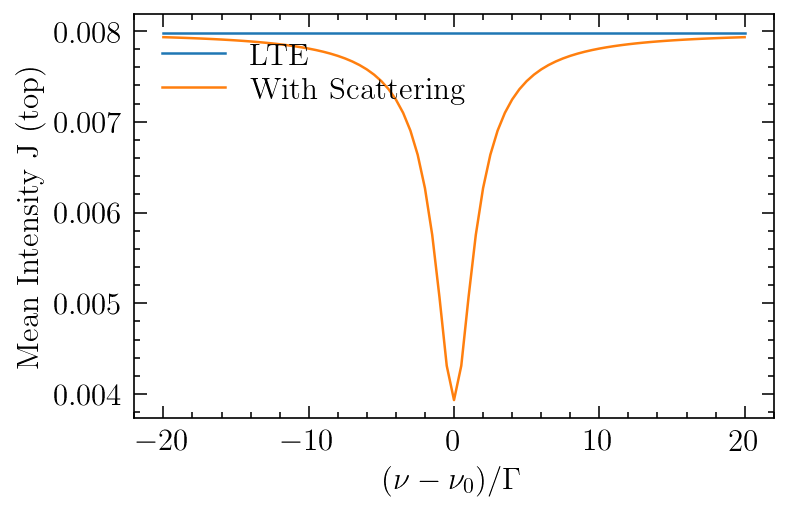

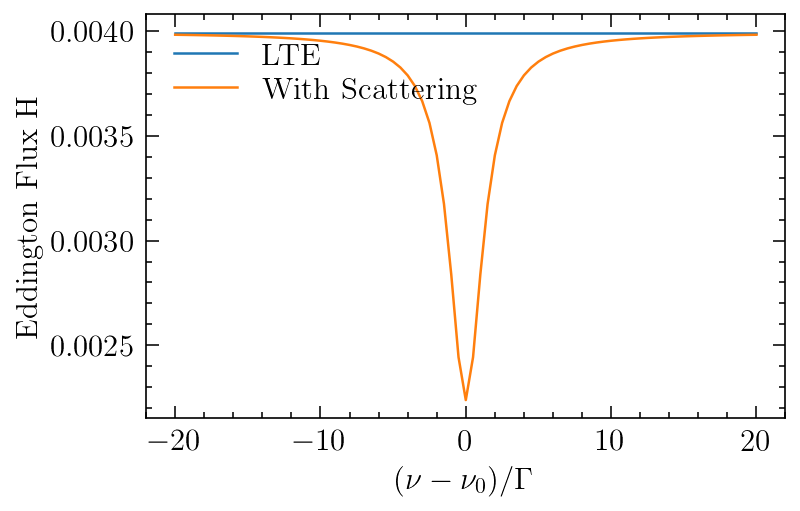

In [9]:
import pandas as pd

clean_rows = []
with open("temp vs tau.csv") as f:
    header = next(f).strip().split(",")
    for line in f:
        tau, Ttau = line.strip().split(",")
        value, unit = Ttau.split()
        clean_rows.append([float(tau), float(value), unit])

df = pd.DataFrame(clean_rows, columns=["tau", "T(tau)", "unit"])

tau = df["tau"]
T_vals = df["T(tau)"]
print(tau)

# Forces tau to be at zero 
if tau[0] > 0:
    tau = np.concatenate(([0.0], tau))
    T_vals = np.concatenate(([T_vals[0]], T_vals))
print(tau)


T = (T_vals * u.K)


nu = c.c / (880 * u.nm)            # line at 880 nm ( Methane line region ) 
Bnus = calc_Bnu(T, nu)           

I = np.eye(len(tau))

# Line core (single frequency) 


tau_threshold = 0.01
core_mask = (tau < tau_threshold)

#This is the ratio of the line scattering to continuum opacity
line_strength = 100.0

#Integrate the ratio of kappa_nu/kappa_R to get tau_nu(tau)
chi_nu_rat = np.ones(len(tau))
chi_nu_rat[core_mask] = line_strength + 1.0
tau_nu = np.concatenate(([0.0], cumtrapz(chi_nu_rat, tau)))


eps = np.ones_like(tau_nu)
eps[core_mask] = 1.0 / (line_strength + 1.0)
eps_mat = np.diag(eps)

lambda_mat = lambda_matrix(tau_nu)

J_LTE = np.dot(lambda_mat, Bnus)
J_scat = np.linalg.solve(I - np.dot(lambda_mat, I - eps_mat),
                         np.dot(lambda_mat, eps * Bnus))

print("\n--- Line Core computation (τ < {:.3g}) ---".format(tau_threshold))
print("LTE line flux: {:.2e}".format(J_LTE[0]))
print("Scattered line flux: {:.2e}".format(J_scat[0]))

# Full line profile (array of frequencies)

nnu = 81
dnu = np.linspace(-20, 20, nnu)
line_strengths = 100.0 / (1.0 + dnu**2)

J_LTE = np.empty(nnu)
J_scat = np.empty(nnu)
H_LTE = np.empty(nnu)
H_scat = np.empty(nnu)

for i, ls in enumerate(line_strengths):
    chi_nu_rat[:] = 1.0
    chi_nu_rat[core_mask] = ls + 1.0

    tau_nu = np.concatenate(([0.0], cumtrapz(chi_nu_rat, tau)))

    eps[:] = 1.0
    eps[core_mask] = 1.0 / (ls + 1.0)
    eps_mat = np.diag(eps)

    lambda_mat = lambda_matrix(tau_nu)
    phi_mat = phi_matrix(tau_nu)

    J_LTE[i] = np.dot(lambda_mat, Bnus)[0].cgs.value
    J_all_layers = np.linalg.solve(I - np.dot(lambda_mat, I - eps_mat),
                                   np.dot(lambda_mat, eps * Bnus))
    J_scat[i] = J_all_layers[0].cgs.value

    S_all_layers = (1.0 - eps) * J_all_layers + eps * Bnus
    H_LTE[i] = np.dot(phi_mat, Bnus)[0].cgs.value
    H_scat[i] = np.dot(phi_mat, S_all_layers)[0].cgs.value


plt.figure(1)
plt.clf()
plt.plot(dnu, J_LTE, label='LTE')
plt.plot(dnu, J_scat, label='With Scattering')
plt.xlabel(r"$(\nu - \nu_0)/\Gamma$")
plt.ylabel("Mean Intensity J (top)")
plt.legend()

plt.figure(2)
plt.clf()
plt.plot(dnu, H_LTE, label='LTE')
plt.plot(dnu, H_scat, label='With Scattering')
plt.xlabel(r"$(\nu - \nu_0)/\Gamma$")
plt.ylabel("Eddington Flux H")
plt.legend()
